# Minería de datos: PEC3 - Clasificación con árboles de decisión
### Oliver Luque Caballero
Mayo 2024 | 4t cuatrimestre

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import plot_tree,export_text,DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.backends.backend_pdf
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('credit-6.csv')
df.count()

checking_balance        1000
months_loan_duration    1000
credit_history          1000
purpose                 1000
amount                  1000
savings_balance         1000
employment_length       1000
installment_rate        1000
personal_status         1000
other_debtors           1000
residence_history       1000
property                1000
age                     1000
installment_plan        1000
housing                 1000
existing_credits        1000
default                 1000
dependents              1000
telephone               1000
foreign_worker          1000
job                     1000
dtype: int64

## Análisis preliminar de los datos
### Exploración inicial de los datos
Si observamos la documentación del dataset, podemos ver que estas columnas representan lo siguiente:

In [980]:
df.head(n=10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,1,1,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed


Podemos ver como tenemos varias columnas diferentes a estudiar:
- `checking_balance` (Estado de cuenta corriente existente): Categórica con cuatro niveles que describen el estado de la cuenta corriente.
- `months_loan_duration` (Duración del préstamo en meses): Variable entera que indica la duración del préstamo en meses.
- `credit_history` (Historial crediticio): Categórica con cinco niveles que describe el historial crediticio del individuo.
- `purpose` (Propósito del préstamo): Categórica que indica el propósito del préstamo.
- `amount` (Monto del crédito): Variable entera que representa el monto del crédito.
- `savings_balance` (Saldo de ahorros/cuentas): Categórica que describe el saldo en la cuenta de ahorros o bonos.
- `employment_length` (Antigüedad laboral): Categórica que indica la antigüedad laboral actual.
- `installment_rate` (Tasa de cuotas en porcentaje del ingreso disponible): Variable entera que representa la tasa de cuotas como porcentaje del ingreso disponible.
- `personal_status` (Estado personal y sexo): Categórica que indica el estado personal y el sexo del individuo.
- `other_debtors` (Otros deudores/garantes): Categórica que describe la presencia de otros deudores o garantes.
- `residence_history` (Tiempo de residencia actual): Variable entera que representa el número de años que el individuo ha vivido en la residencia actual.
- `property` (Propiedad): Categórica que describe el tipo de propiedad poseída.
- `age` (Edad): Variable entera que representa la edad del individuo.
- `installment_plan` (Otros planes de cuotas): Categórica que indica la presencia de otros planes de cuotas.
- `housing` (Vivienda): Categórica que describe la situación de vivienda.
- `existing_credits` (Número de créditos existentes en este banco): Variable entera que representa el número de créditos existentes en este banco.
- `job` (Trabajo/Ocupación): Categórica que indica la ocupación o tipo de trabajo.
- `dependents` (Número de personas a cargo): Variable entera que representa el número de personas a cargo.
- `telephone` (Teléfono): Categórica que indica si el individuo tiene teléfono.
- `foreign_worker` (Trabajador extranjero): Categórica que indica si el individuo es trabajador extranjero.
- `default` (Variable objetivo): Variable binaria con dos niveles que representa la solvencia crediticia del individuo.

Ahora vamos a ver si el tipo de variable es el mismo en el dataset que los definidos en la documentación de los datos.

In [981]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

Podemos ver como nos encontramos con 1000 filas y las 21 columnas mencionadas. Además, no encontramos ningún valor nulo en los datos. 

### Visualización de los datos
Vamos a estudiar las diferentes variables antes de empezar a limpiar los datos:

#### Variables categóricas:

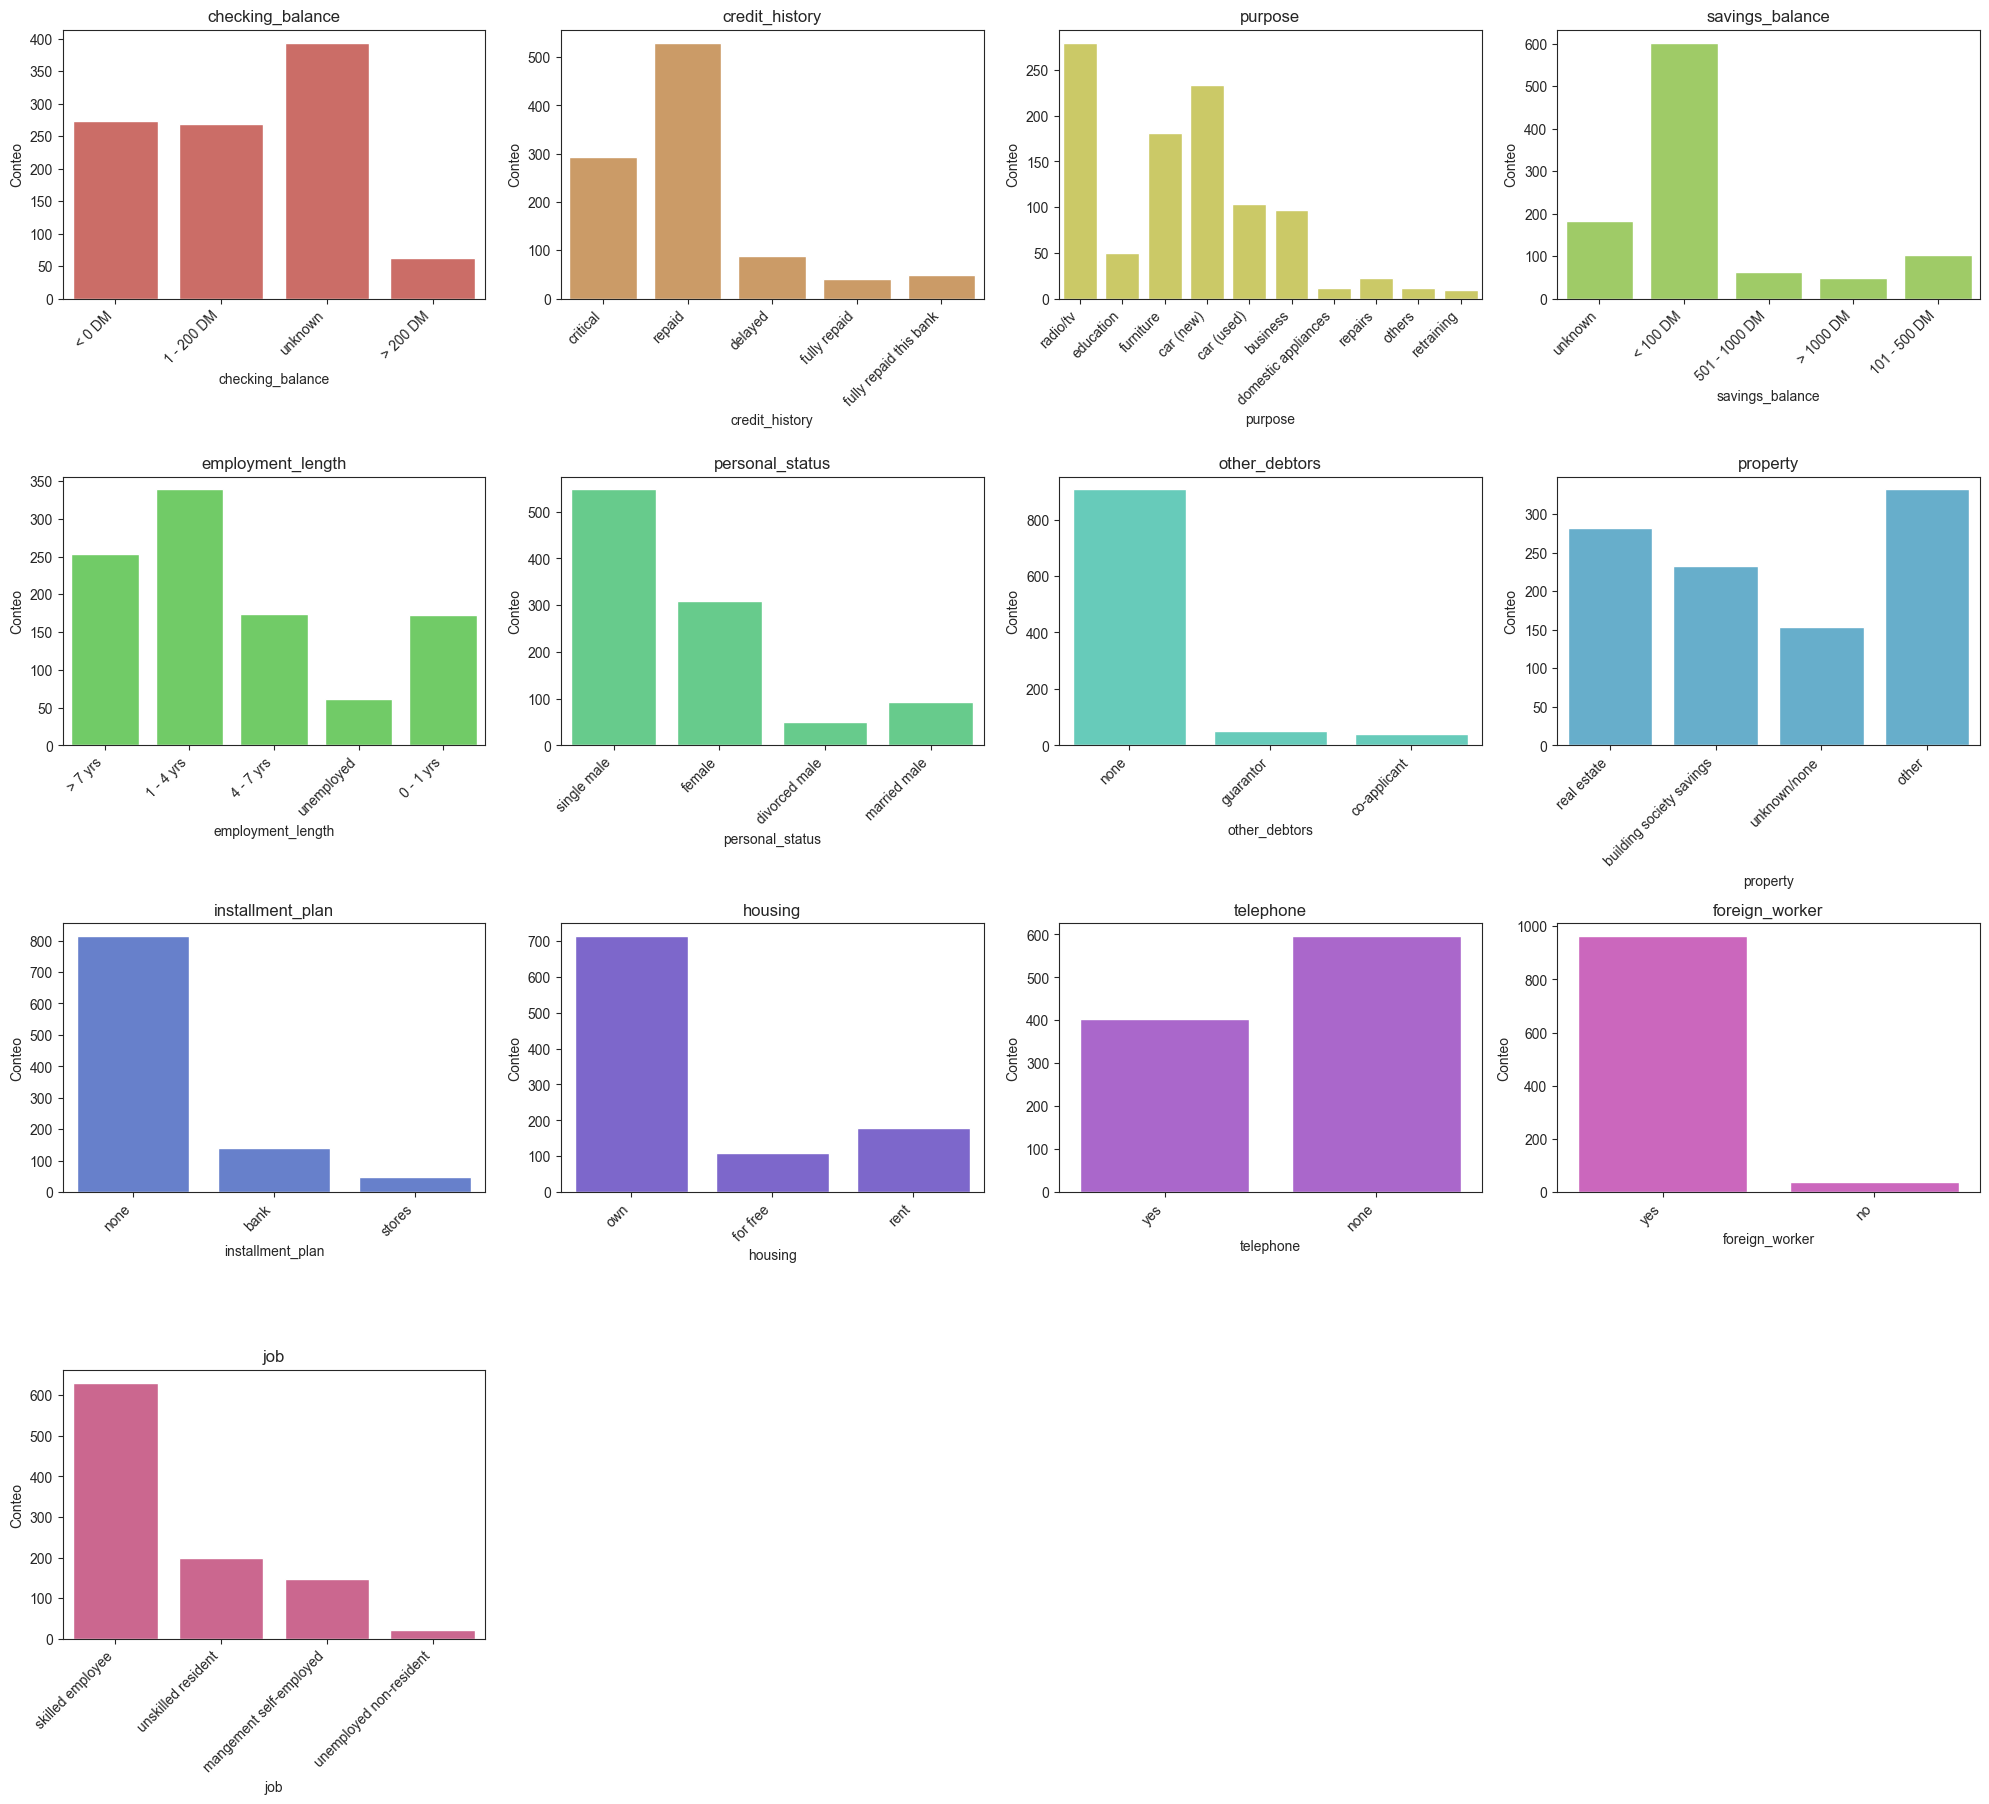

In [982]:
warnings.filterwarnings('ignore')


var_categorical = df.select_dtypes(include=['object'])

plt.figure(figsize=(20, 30))
colors = sns.color_palette("husl", n_colors=len(var_categorical.columns))

# gráfico de barras para cada variable categórica
for i, (column, color) in enumerate(zip(var_categorical.columns, sns.color_palette("hls", n_colors=len(var_categorical.columns)))):
    ax = plt.subplot(7, 4, i + 1)
    sns.countplot(x=column, data=df, color=color)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

Podemos comentar:

- `checking_balance`: Hay bastantes valores desconocidos, pero de los que conocemos, los estados de cuenta corriente existentes más comunes son `< 0 DM` y `1-200 DM`.
- `credit_history`: Los historiales crediticios más comunes son `repaid` y `critical`.
- `purpose`: Los propósitos de préstamo más comunes son `radio/tv`, `coche` y `muebles`.
- `savings_balance`: El saldo en la cuenta de ahorros o bonos más común es `< 100 DM`.
- `employment_length`: La antigüedad laboral más común es `1-4 años` seguida de `más de 7 años`.
- `personal_status`: Destaca que las categorías registradas son `single male`, `female`, `divorced male` y `married male`. No existen categorías como `single female`, `divorced female` o `married female`. Dicho esto, la categoría más común es `single male` seguido de `female`.
- `other_debtors`: Casi para todos los casos no hay presencia de otros deudores o garantes.
- `property`: El tipo de propiedad poseída más común (de las registradas) es `real state` seguido de `building society savings`.
- `installment_plan`: Para la mayoría de los casos no hay otros planes de cuotas.
- `housing`: La situación de vivienda más común es `propiedad (own)`.
- `job`: El tipo de trabajo más común es `skilled employee`.
- `telephone`: Por lo general los individuos no tienen teléfono.
- `foreign_worker`: La mayoría de los individuos son `trabajadores extranjeros`.


#### Variables numéricas:

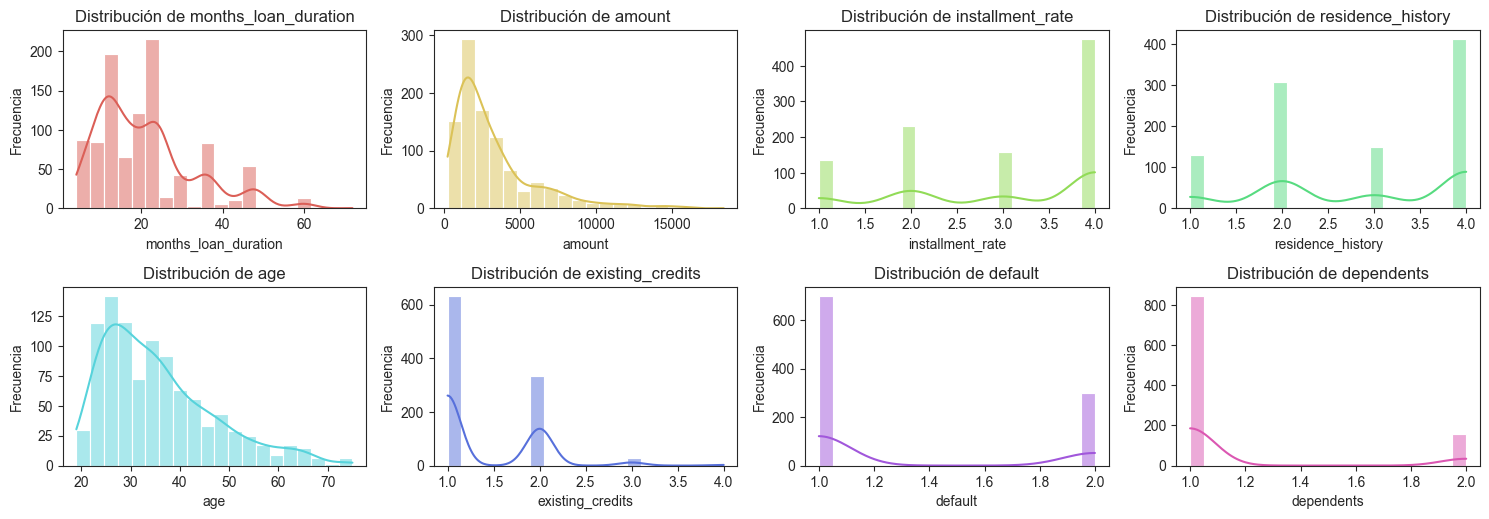

In [983]:
# variables numéricas
var_numerical = df.select_dtypes(include=['int64'])

plt.figure(figsize=(15, 10))
colors = sns.color_palette("hls", n_colors=len(var_numerical.columns))

# histograma para cada variable numérica
for i, (column, color) in enumerate(zip(var_numerical.columns, colors)):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[column], bins=20, kde=True, color=color)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Podemos comentar:

- `months_loan_duration`: Las duraciones del préstamo más comunes son `12` y `20` meses.
- `amount`: La cantidad de crédito prestado se encuentra, por lo general, entre `250` y `5000`.
- `installment_rate`: La tasa de cuota de pago más común es `4`.
- `residence_history`: Los tiempos de residencia en la vivienda actual más comunes son `2` y `4`.
- `age`: La edad de los solicitantes suele ser entre `23` y `37` años.
- `existing_credits`: Los números de crédito existentes en este banco más comunes son `1` y `2`.
- `default`: La mayoría de los solicitantes tienen un historial crediticio positivo.
- `dependents`: El número de personas a cargo más común varía entre `1` a `2`.


#### Correlaciones:
Ahora vamos a visualizar todas las diferentes variables para cuando encontramos con los dos diferentes valores de la variable objetivo, de esta manera, podremos ver las diferentes correlaciones entre `default` y las otras variables. Donde `1`= cumplimiento y `2`= incumplimiento.

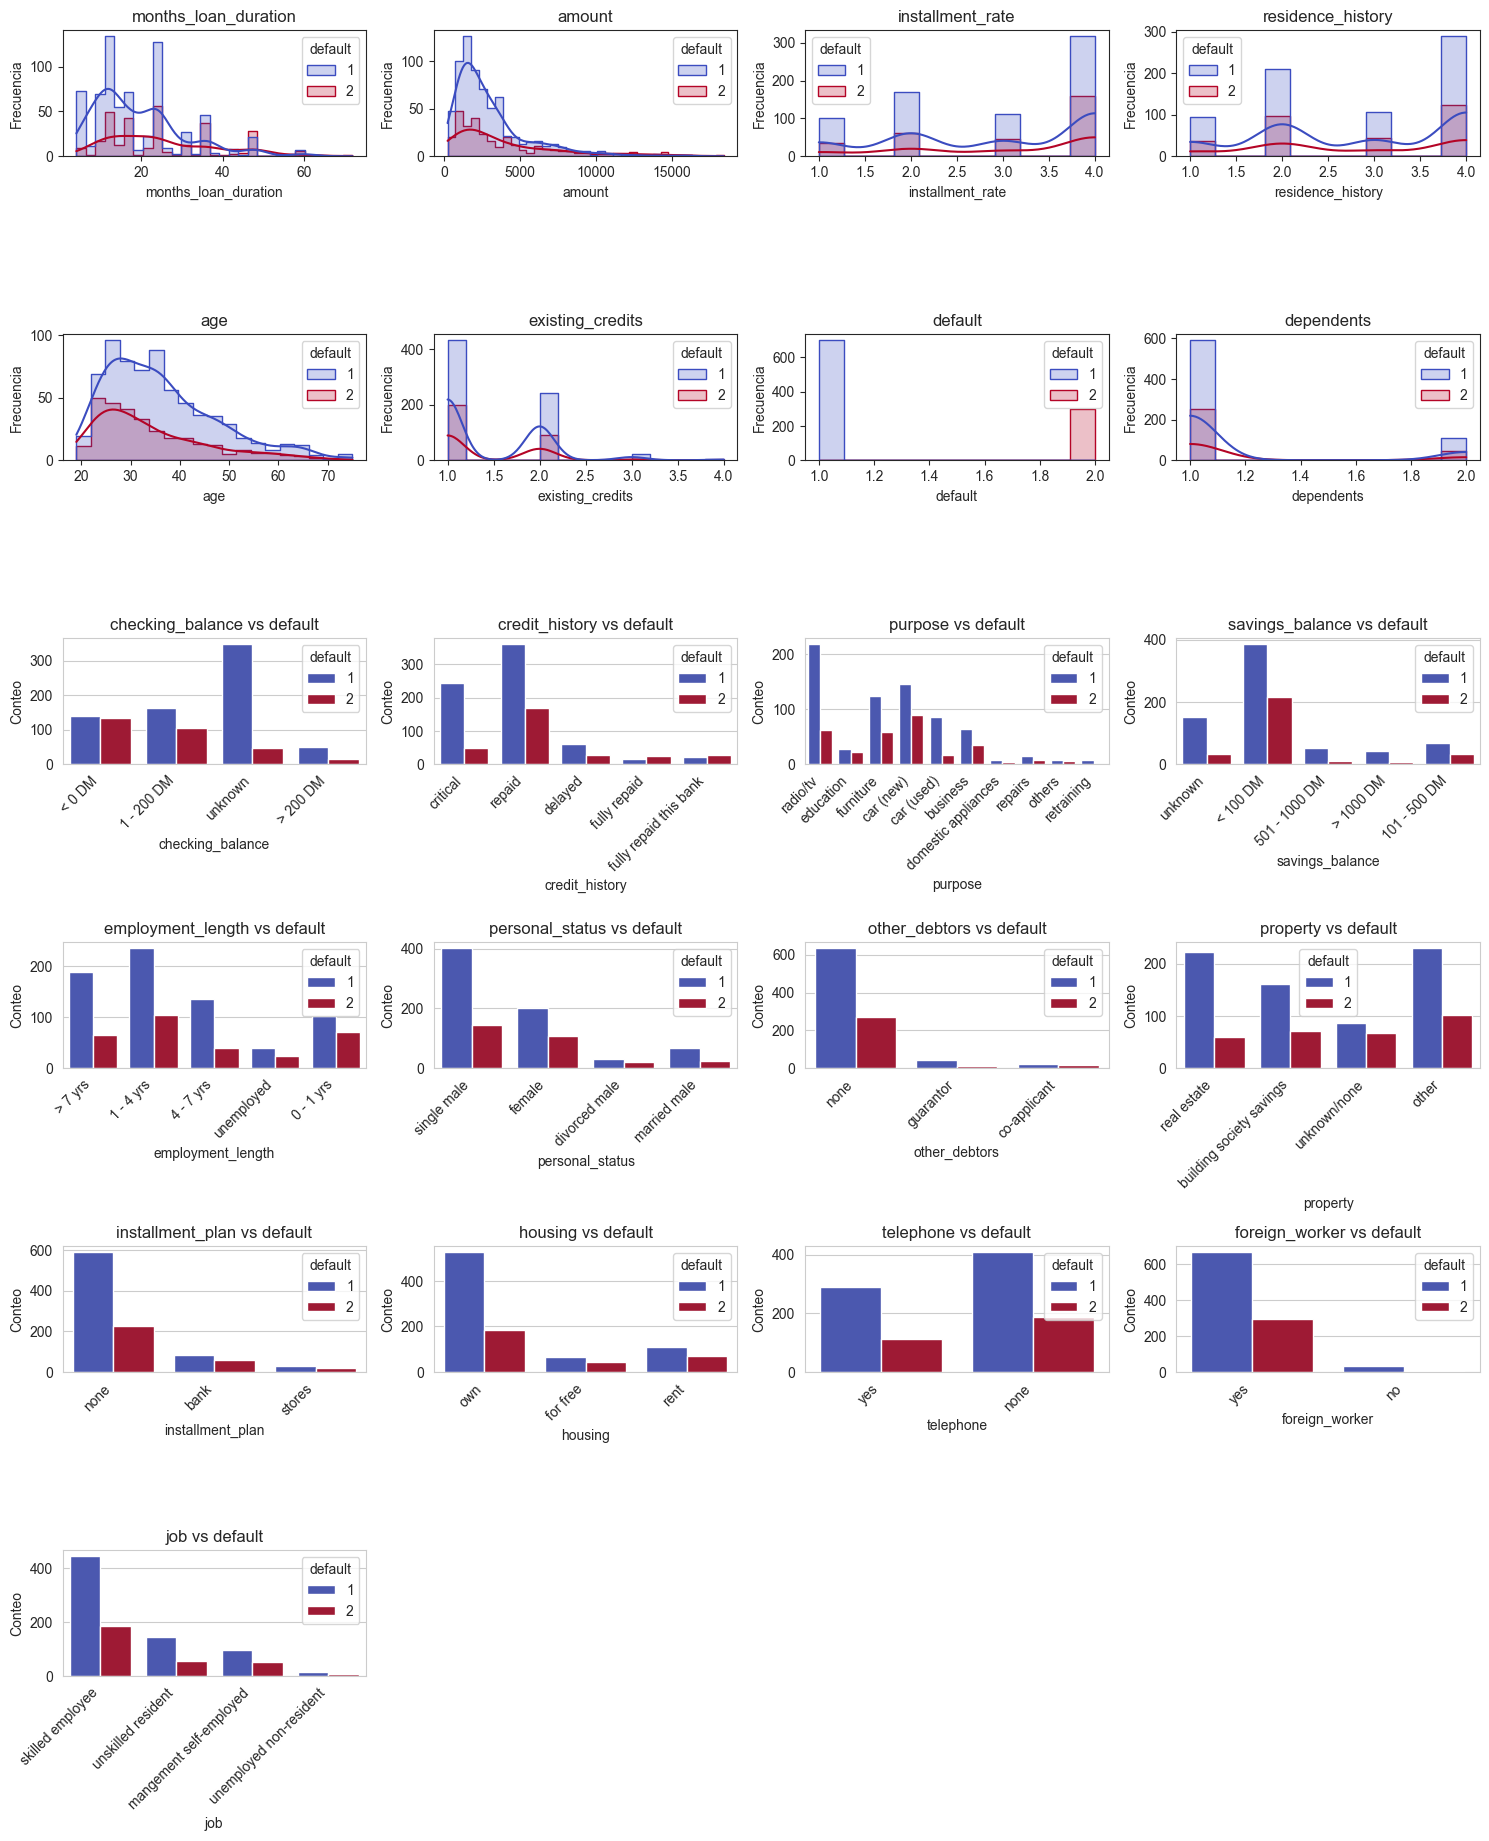

In [984]:
plt.figure(figsize=(15, 20))

# histograma variable numérica
for i, column in enumerate(var_numerical.columns):
    plt.subplot(7, 4, i + 1)
    sns.histplot(df, x=column, hue='default', kde=True, palette='coolwarm', element='step', common_norm=False)

    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

# countplot variable categórica
for i, column in enumerate(var_categorical.columns):
    sns.set_style("whitegrid")
    plt.subplot(7, 4, i + 1 + len(var_numerical.columns))
    sns.countplot(x=column, hue='default', data=df, palette='coolwarm')

    plt.xticks(rotation=45, ha="right")
    plt.subplots_adjust(hspace=0.1)
    plt.title(f'{column} vs default')
    plt.xlabel(column)
    plt.ylabel('Conteo')

plt.tight_layout()
plt.show()
sns.set_style("ticks")


- `months_loan_duration`: 
  - Los préstamos con una duración de entre `25 y 50` meses muestran una mayor frecuencia de incumplimientos en comparación con otras duraciones.

- `amount`: 
  - Los préstamos de más de `5000` tienen una mayor incidencia de incumplimientos.

- `installment_rate`: 
  - Todas las tasas de cuotas de pago muestran una proporción similar de cumplimientos e incumplimientos.

- `residence_history`: 
  - Los préstamos para personas con un historial de residencia de `1` y `3` años tienen una mayor tasa de incumplimientos.

- `age`: 
  - Los solicitantes menores de `25` años tienden a incumplir más sus préstamos en comparación con otros grupos de edad.

- `existing_credits`: 
  - El número de créditos existentes no parece influir significativamente en la proporción de cumplimientos e incumplimientos.

- `dependents`: 
  - Los solicitantes con `2` dependientes presentan una mayor tasa de incumplimientos.

- `checking_balance`: 
  - Los solicitantes con saldos de cuenta desconocidos tienden a cumplir más sus préstamos en comparación con aquellos con saldos conocidos.
  - Los saldos `< 0 DM` están asociados con una mayor tasa de incumplimientos.

- `credit_history`: 
  - Los solicitantes con un historial de crédito `crítico` tienen una mayor proporción de cumplimientos.
  - Aquellos con un historial de crédito totalmente pagado muestran una mayor incidencia de incumplimientos.

- `purpose`: 
  - Los préstamos destinados a `educación` tienen una mayor tasa de incumplimientos.
  - Los préstamos para `radio/TV` y `muebles` muestran una menor frecuencia de incumplimientos.

- `savings_balance`: 
  - Los solicitantes con saldos de ahorro inferiores a `100 DM` tienden a incumplir más sus préstamos.

- `employment_length`: 
  - Los solicitantes con menos de `1` año de empleo o desempleados tienden a tener una mayor tasa de incumplimientos.

- `personal_status`: 
  - Los solicitantes `solteros` presentan una menor tasa de incumplimientos en comparación con otros estados civiles.

- `other_debtors`: 
  - Los solicitantes sin otros deudores tienen una menor incidencia de incumplimientos.

- `property`: 
  - Los solicitantes con propiedades `real state` tienden a incumplir menos.

- `installment_plan`: 
  - La existencia de un plan de cuotas está asociada con una mayor tasa de incumplimientos.

- `housing`: 
  - Los solicitantes que poseen su vivienda tienen una menor incidencia de incumplimientos en comparación con otros tipos de vivienda.

- `telephone`: 
  - Tener un `teléfono` está ligeramente asociado con una menor tasa de incumplimientos.

- `foreign_worker`: 
  - Los `trabajadores extranjeros` muestran una menor tasa de incumplimientos.

- `job`: 
  - Los `empleados cualificados` tienen una menor incidencia de incumplimientos.


## Preparado y tratamiento de los datos
Para estudiar las variables es necesario preparar el dataset adecuadamente, empezando por la limpieza y preparación de los datos.

### Cambiar variables categóricas
Vamos a utilizar dos métodos diferentes para convertir las variables de objects a integrer. Para aquellas variables con solo dos categorías utilizaremos **Binary Encoding**, para cuando encontramos categorías con un orden específico utilizaremos **Label Encoding** y finalmente para cuando no tengamos un orden en concreto utilizaremos **One-Hot Encoding**. Es decir:
- **Binary Encoding**:
    - `telephone`
    - `foreign_worker`
- **Label Encoding**:
    - `checking_balance` 
    - `credit_history`
    - `savings_balance`
    - `employment_length`
- **One-Hot Encoding**:
    - `purpose`
    - `personal_status`
    - `other_debtors`
    - `property`
    - `installment_plan`
    - `housing`
    - `job` 


In [985]:

label_columns = ['checking_balance', 'credit_history', 'savings_balance', 'employment_length']
label_changes = LabelEncoder()
df[label_columns] = df[label_columns].apply(label_changes.fit_transform)

one_hot_columns = ['purpose', 'personal_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'job']
df = pd.get_dummies(df, columns=one_hot_columns, prefix=one_hot_columns)

df['telephone'] = (df['telephone'] == 'yes').astype(int)
df['foreign_worker'] = (df['foreign_worker'] == 'yes').astype(int)

In [986]:
df.head()


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_length,installment_rate,residence_history,age,existing_credits,...,installment_plan_bank,installment_plan_none,installment_plan_stores,housing_for free,housing_own,housing_rent,job_mangement self-employed,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,1,6,0,1169,4,3,4,4,67,2,...,False,True,False,False,True,False,False,True,False,False
1,0,48,4,5951,2,1,2,2,22,1,...,False,True,False,False,True,False,False,True,False,False
2,3,12,0,2096,2,2,2,3,49,1,...,False,True,False,False,True,False,False,False,False,True
3,1,42,4,7882,2,2,2,4,45,1,...,False,True,False,True,False,False,False,True,False,False
4,1,24,1,4870,2,1,3,4,53,2,...,False,True,False,True,False,False,False,True,False,False


In [987]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   checking_balance                   1000 non-null   int32
 1   months_loan_duration               1000 non-null   int64
 2   credit_history                     1000 non-null   int32
 3   amount                             1000 non-null   int64
 4   savings_balance                    1000 non-null   int32
 5   employment_length                  1000 non-null   int32
 6   installment_rate                   1000 non-null   int64
 7   residence_history                  1000 non-null   int64
 8   age                                1000 non-null   int64
 9   existing_credits                   1000 non-null   int64
 10  default                            1000 non-null   int64
 11  dependents                         1000 non-null   int64
 12  telephone            

## Análisis de correlaciones

La matriz de correlación nos ayuda a entender las relaciones lineales entre pares de variables en los datos. Para ello vamos a crear la matriz de nuestros datos:

<Axes: >

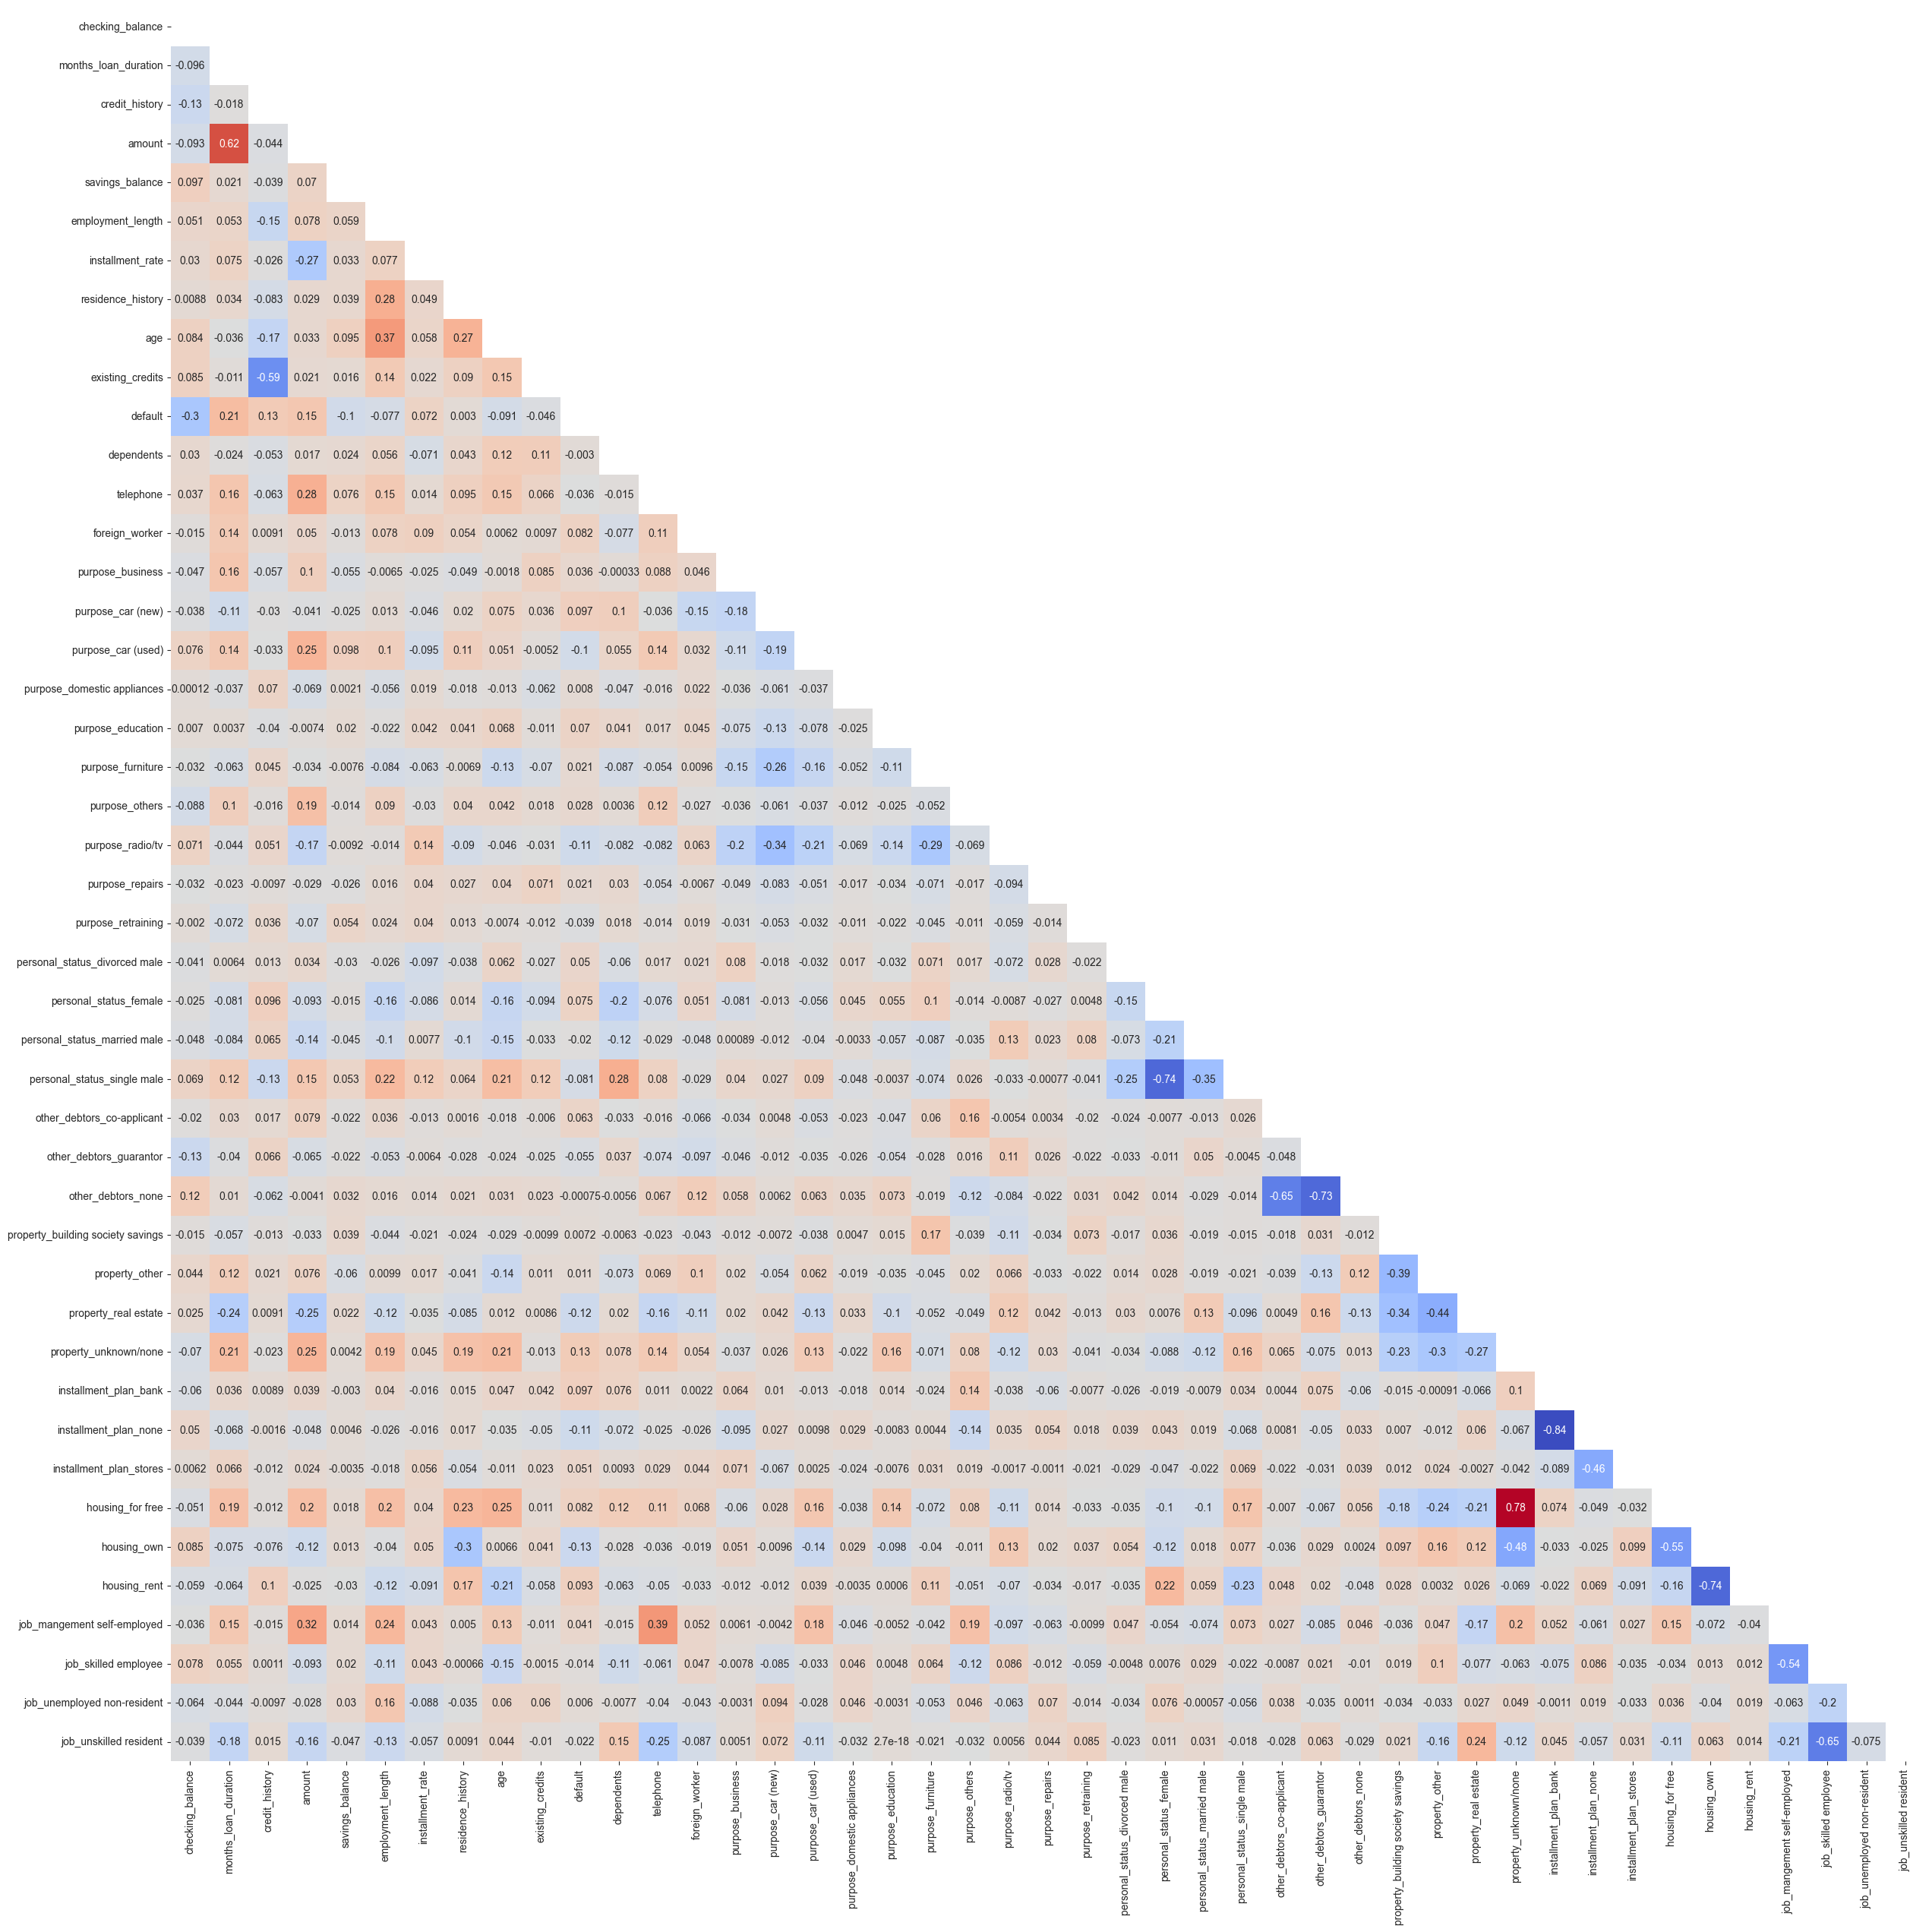

In [988]:
corr_matrix = df.corr()

plt.figure(figsize=(30, 30))

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot=True, mask=mask, square=True, cbar=False, cmap="coolwarm")

Podemos ver como tenemos una matriz demasiado grande para poder analizarla. Por ello, vamos a filtrar por aquellos valores más altos en valor absoluto.

In [989]:
high_corr = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix != 1.0)]

high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']

high_corr_pairs['pair'] = high_corr_pairs.apply(lambda row: tuple(sorted([row['Variable 1'], row['Variable 2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['pair']).drop(columns=['pair'])

# Mostrar el DataFrame de pares de variables con alta correlación
high_corr_pairs = high_corr_pairs.reindex(high_corr_pairs['Correlación'].abs().sort_values(ascending=False).index)

print(high_corr_pairs)

                     Variable 1                   Variable 2  Correlación
11        installment_plan_bank        installment_plan_none    -0.840546
10        property_unknown/none             housing_for free     0.779853
4        personal_status_female  personal_status_single male    -0.738036
16                  housing_own                 housing_rent    -0.735968
7       other_debtors_guarantor           other_debtors_none    -0.731408
20         job_skilled employee       job_unskilled resident    -0.652438
6    other_debtors_co-applicant           other_debtors_none    -0.645721
0          months_loan_duration                       amount     0.624984
1                credit_history             existing_credits    -0.587021
14             housing_for free                  housing_own    -0.548445
18  job_mangement self-employed         job_skilled employee    -0.543852


Podemos ver como los valores más altos de correlación en valor absoluto entre las variables es `installment_plan_bank` y `installment_plan_none` con un valor de correlación -0.840546. Seguidamente, tenemos `property_unknown/none` y `housing_for free` con 0.779853. Aun así, no encontramos valores muy muy cercanos a 1 como para determinar que dichas variables dan la misma información.

In [990]:
default_corr = corr_matrix['default'].drop('default')
default_corr = default_corr.reindex(default_corr.abs().sort_values(ascending=False).index)
default_corr

checking_balance                    -0.302406
months_loan_duration                 0.214927
amount                               0.154739
housing_own                         -0.134589
credit_history                       0.130329
property_unknown/none                0.125750
property_real estate                -0.119300
installment_plan_none               -0.113285
purpose_radio/tv                    -0.106922
savings_balance                     -0.103133
purpose_car (used)                  -0.099791
purpose_car (new)                    0.096900
installment_plan_bank                0.096510
housing_rent                         0.092785
age                                 -0.091127
foreign_worker                       0.082079
housing_for free                     0.081556
personal_status_single male         -0.080677
employment_length                   -0.076891
personal_status_female               0.075493
installment_rate                     0.072404
purpose_education                 

Por otro lado, los valores que más influyen en la variable objetivo son `checking_balance` y `months_loan_duration`. En el caso de `checking_balance` es negativo, es decir, cuando la cuenta corriente mejora es más probable que la solvencia crediticia sea buena. Y al revés pasa con `months_loan_duration`, cuando mayor sea el número de meses que dura el préstamo, más probable es que haya un incumplimiento. 

## Arbol de decisión con CART

Para realizar el arbol de decisiones debemos hacer un dataset `X` sin la variable objetivo y `Y` con la columna objetivo. Seguidamente vamos a separar el dataset en uno para entrenar y otro para evaluar, concretamente, 85% para entrenar y 15% para valorar.

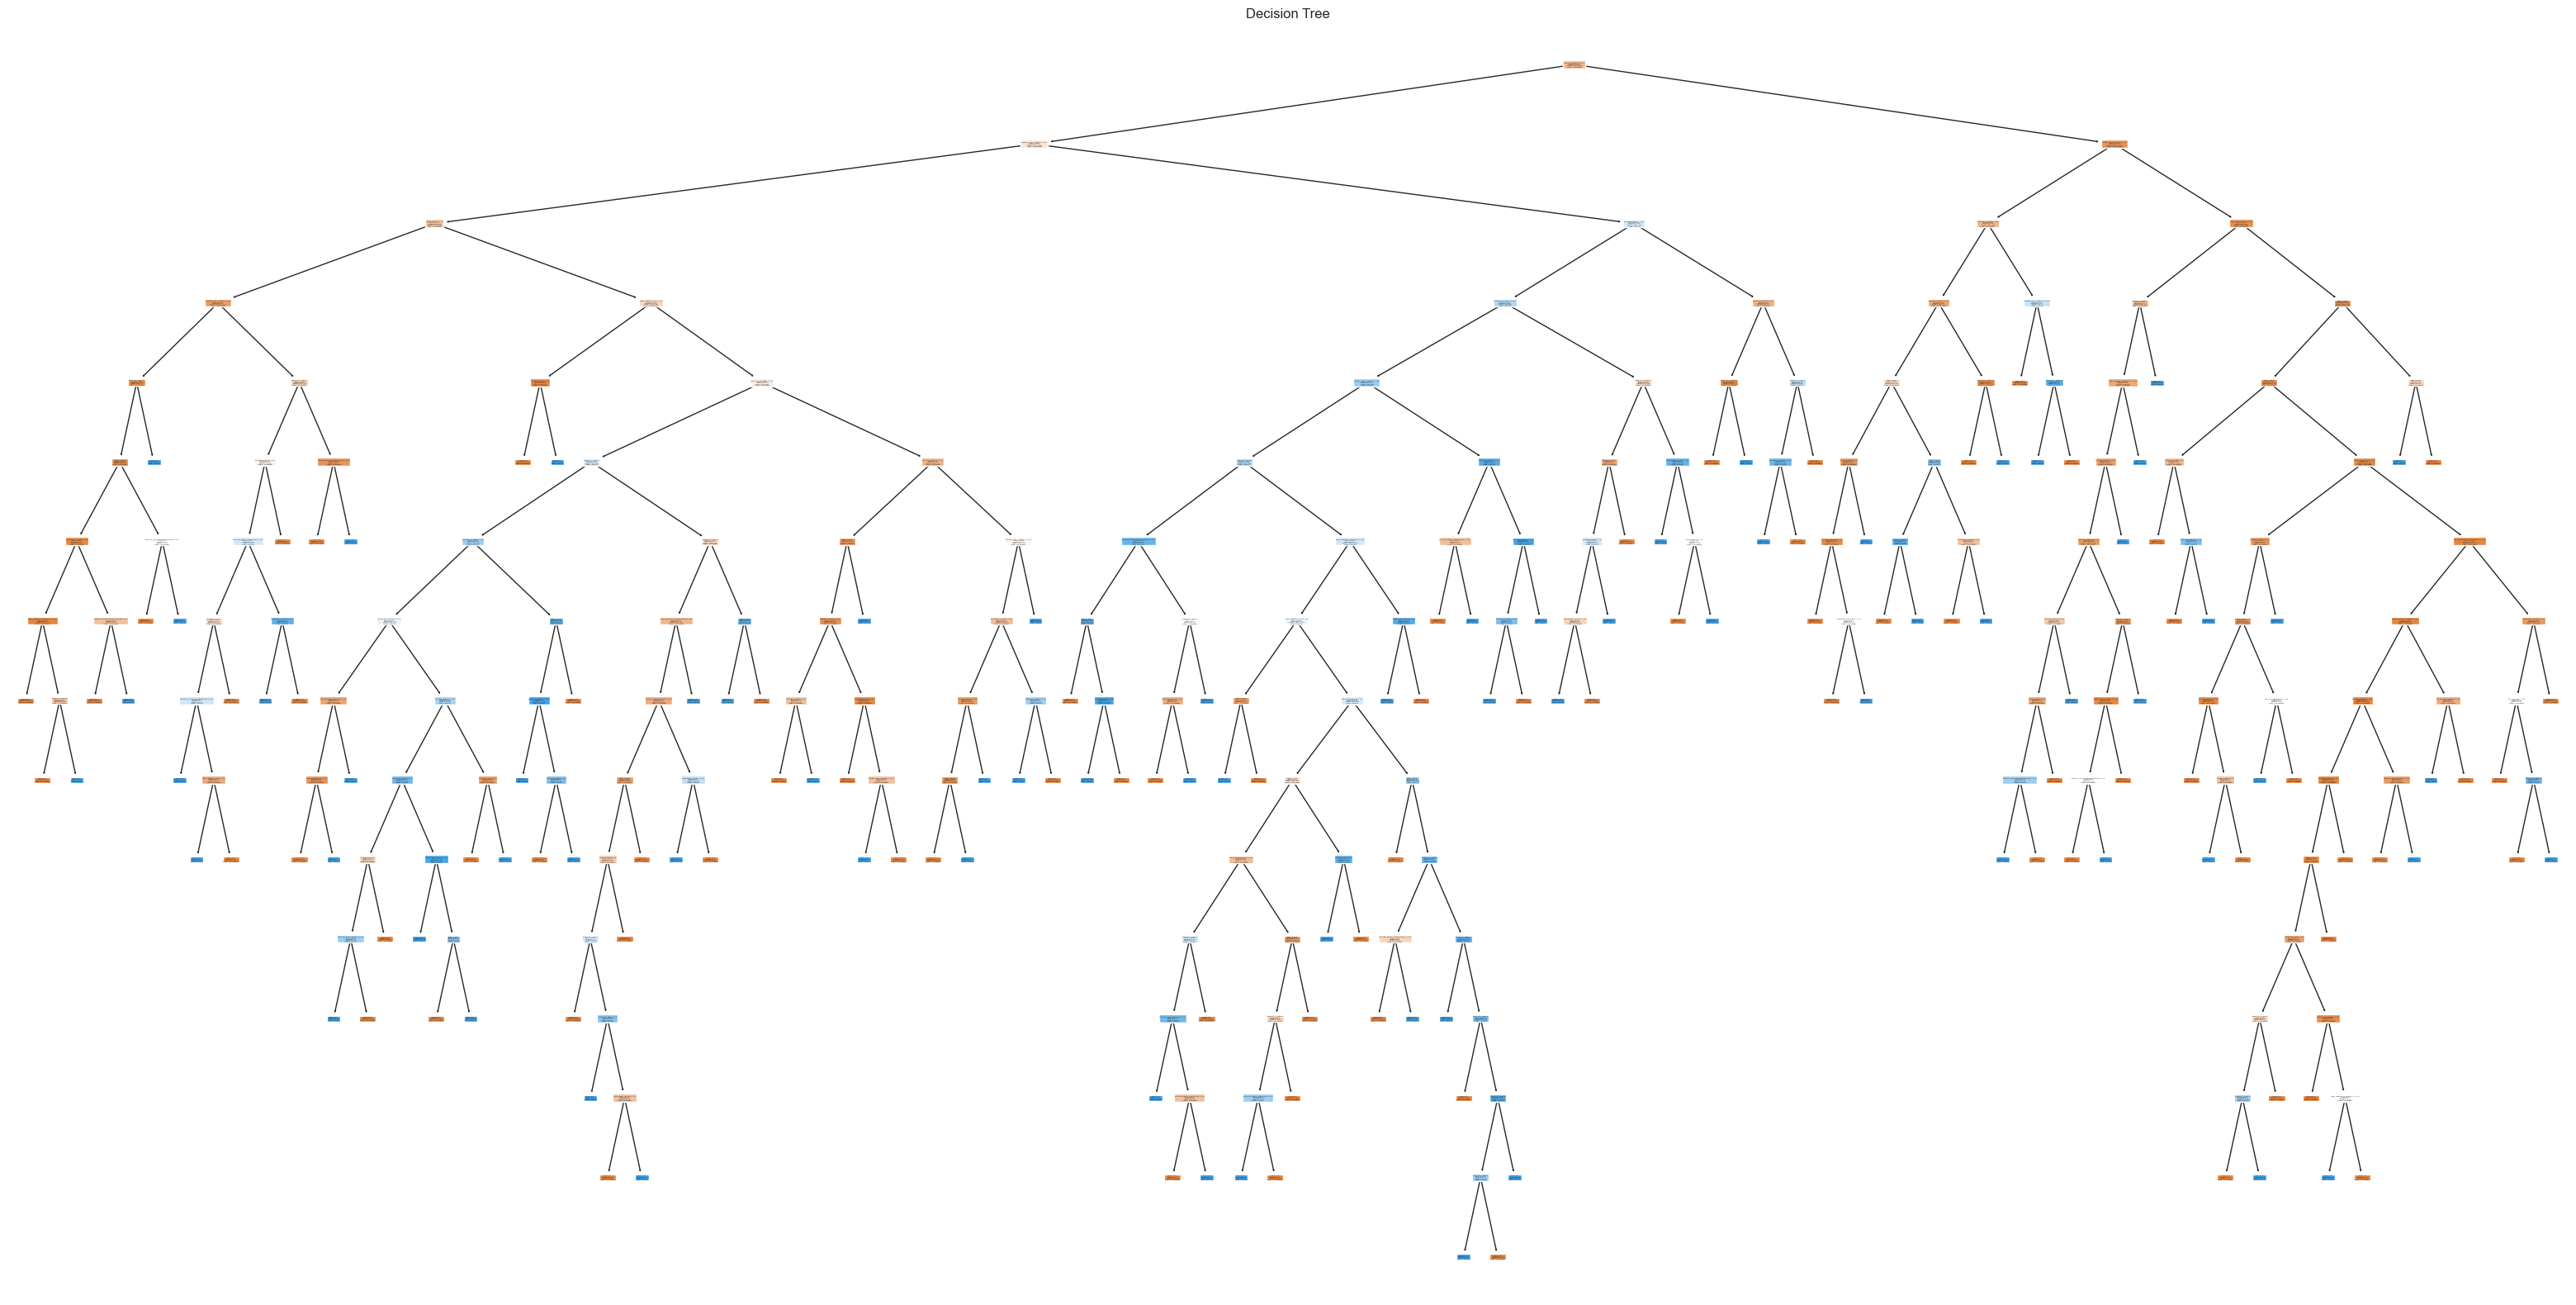

In [991]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# crear y entrenar el árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=10)
tree_clf.fit(X_train, y_train)


# Ajustar el tamaño de la figura para que ocupe más de una página al guardar en PDF
fig, ax = plt.subplots(figsize=(40, 20))  # Ajusta el tamaño según tus necesidades
plot_tree(tree_clf, feature_names=X.columns, filled=True, ax=ax, class_names=['No Default', 'Default'])
plt.title("Decision Tree")
plt.show()


# Guardar la figura como un archivo PDF
pdf = matplotlib.backends.backend_pdf.PdfPages("tree.pdf")
pdf.savefig(fig)
pdf.close()


In [992]:
# realizar predicciones en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

# calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.695

Podemos ver como nuestro modelo tiene un 0.67 de precisión. 

Para consultar adecuadamente el arbol se ha exportado a pdf. 

### Reglas obtenidas

Empezaremos obteniendo las reglas de decisiones que ha seguido nuestro arbol para asignar los valores de default.

In [993]:
tree_rules = export_text(tree_clf, feature_names=list(X_train.columns))

print("Reglas de Decisión:")
print(tree_rules)

Reglas de Decisión:
|--- checking_balance <= 1.50
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- months_loan_duration <= 15.50
|   |   |   |   |--- amount <= 4807.00
|   |   |   |   |   |--- age <= 59.00
|   |   |   |   |   |   |--- employment_length <= 3.50
|   |   |   |   |   |   |   |--- other_debtors_co-applicant <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- other_debtors_co-applicant >  0.50
|   |   |   |   |   |   |   |   |--- amount <= 2815.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- amount >  2815.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- employment_length >  3.50
|   |   |   |   |   |   |   |--- property_building society savings <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- property_building society savings >  0.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |  

### Comentarios

Recordemos que este árbol de decisión se ha construido para predecir la clase de riesgo crediticio (1 o 2) basándose en varias características del solicitante, como el saldo en la cuenta corriente, la duración del préstamo, el historial crediticio, el propósito del préstamo, etc.

- **Nodo Raíz**:
El nodo raíz divide los datos en dos ramas principales según el saldo en la cuenta corriente (checking_balance). Si el saldo es menor o igual a 1.50, se sigue la rama izquierda; si es mayor, se sigue la rama derecha.

- **Rama Izquierda** (Saldo en cuenta corriente <= 1.50):
Esta rama evalúa varias características, incluyendo la duración del préstamo, el historial crediticio, el propósito del préstamo, el estado civil, la cantidad del préstamo, entre otras. Con base en estas características, se generan divisiones adicionales que agrupan a los solicitantes en subgrupos más específicos. Dependiendo del valor de estas características, se toman decisiones hasta llegar a una predicción final sobre la clase de riesgo crediticio.

- **Rama Derecha** (Saldo en cuenta corriente > 1.50):
En esta rama se consideran otras características adicionales, como la existencia de un plan de pago a plazos, la edad del solicitante y la propiedad del solicitante. Similar a la rama izquierda, las decisiones se basan en los valores de estas características para finalmente predecir la clase de riesgo crediticio.


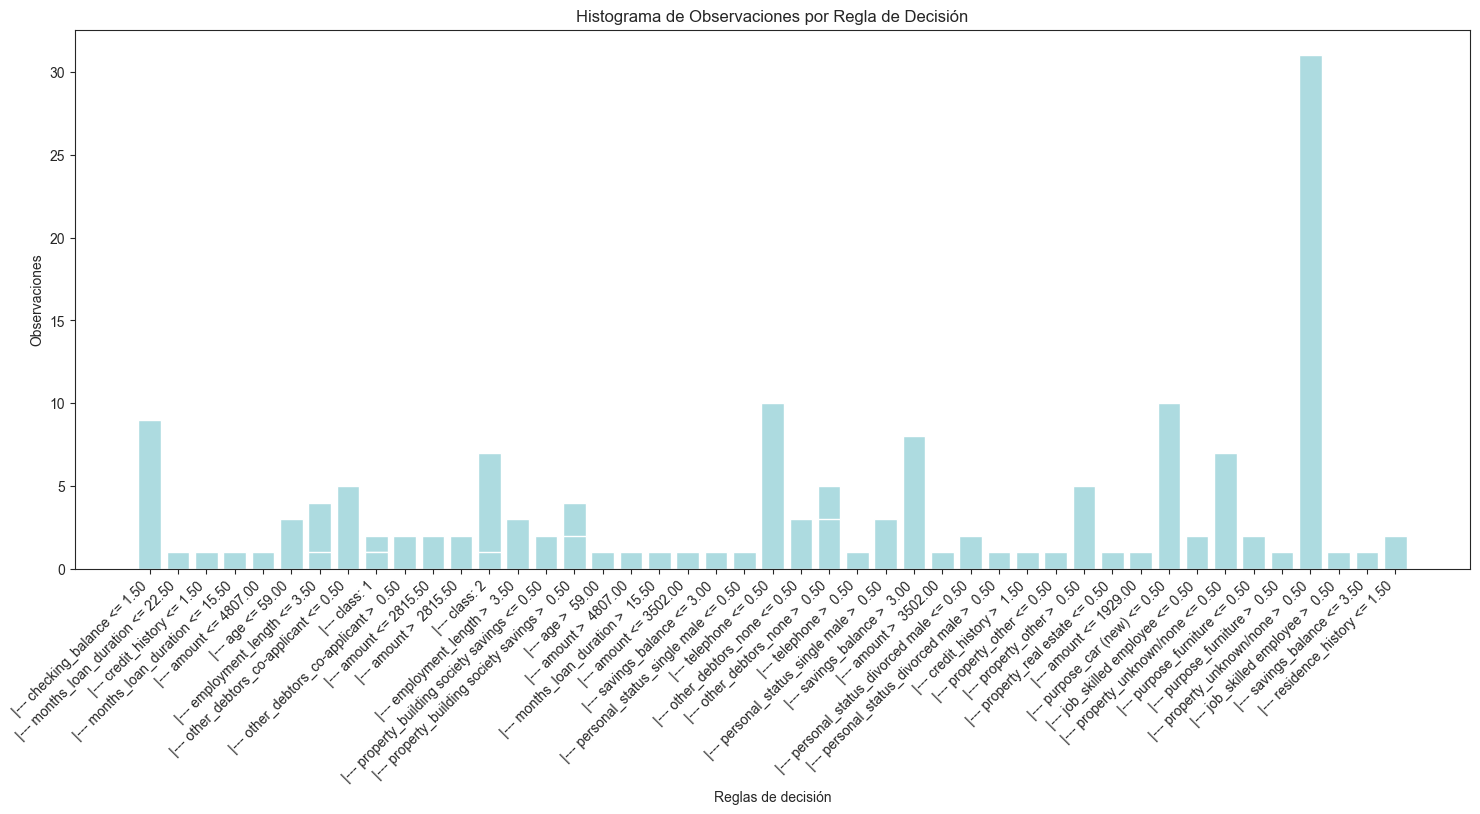

In [994]:
# índices de nodo para cada instancia en el conjunto de prueba
node_indices = tree_clf.apply(X_test)

# reglas de decisión en formato de texto
tree_rules = export_text(tree_clf, feature_names=list(X_train.columns))

# limpiar las reglas
cleaned_rules = re.sub(r'\|\s+', '', tree_rules)

# Observaciones para cada regla
observations_per_rule = {}
for node_index, rule_text in zip(np.unique(node_indices), cleaned_rules.split('\n')):
    mask = (node_indices == node_index)
    observations_per_rule[node_index] = {'rule': rule_text, 'count': np.sum(mask)}

# Obtenemos las reglas
rule_texts = [info['rule'] for info in observations_per_rule.values()]
observation_counts = [info['count'] for info in observations_per_rule.values()]

# Histograma
plt.figure(figsize=(18, 7))
plt.bar(rule_texts, observation_counts, color='#addbe0')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Reglas de decisión')
plt.ylabel('Observaciones')
plt.title('Histograma de Observaciones por Regla de Decisión')
plt.show()

### Análisis de la bondad

In [995]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print("Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Matriz de Confusión:
Verdaderos Positivos (TP): 32
Verdaderos Negativos (TN): 107
Falsos Positivos (FP): 31
Falsos Negativos (FN): 30


Podemos ver como nuestro modelo ha predicho 84 verdaderos positivos y 23 verdaderos negativos. En cambio, ha habido 21 falsos positivos y 22 falsos negativos.

Podemos evaluar el rendimiento del árbol de decisiones gracias al reporte siguiente.


In [996]:
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", class_report)

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       138
           2       0.51      0.52      0.51        62

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.65       200
weighted avg       0.70      0.69      0.70       200



A continuación se desglosan y comentan las métricas presentadas:

#### Clase 1:
- **Precision (Precisión)**: 0.78
  - La precisión es la proporción de verdaderos positivos entre el total de predicciones positivas. Una precisión de 0.78 significa que el 78% de las predicciones de la clase 1 son correctas.
- **Recall (Sensibilidad)**: 0.74
  - El recall es la proporción de verdaderos positivos entre el total de instancias reales de la clase. Un recall de 0.74 significa que el 74% de las instancias de la clase 1 son correctamente identificadas por el modelo.
- **F1-score**: 0.76
  - El F1-score es la media armónica de la precisión y el recall. Un F1-score de 0.76 indica un buen balance entre precisión y recall para la clase 1.
- **Support (Soporte)**: 141
  - El soporte es el número de instancias reales de la clase en el conjunto de datos. Hay 141 instancias de la clase 1.

#### Clase 2:
- **Precision (Precisión)**: 0.45
  - La precisión de 0.45 indica que el 45% de las predicciones de la clase 2 son correctas.
- **Recall (Sensibilidad)**: 0.49
  - Un recall de 0.49 significa que el 49% de las instancias de la clase 2 son correctamente identificadas por el modelo.
- **F1-score**: 0.47
  - El F1-score de 0.47 indica un balance moderado entre precisión y recall para la clase 2.
- **Support (Soporte)**: 59
  - Hay 59 instancias de la clase 2 en el conjunto de datos.

#### Métricas Generales:

- **Accuracy (Exactitud)**: 0.67
  - La exactitud es la proporción de instancias correctamente clasificadas entre el total de instancias. Una exactitud de 0.67 significa que el modelo clasifica correctamente el 67% de las instancias.

- **Macro avg (Promedio macro)**:
  - **Precision (Precisión)**: 0.61
    - La precisión macro es el promedio aritmético de la precisión para cada clase. Es una medida que trata todas las clases por igual, sin tener en cuenta el soporte.
  - **Recall (Sensibilidad)**: 0.62
    - El recall macro es el promedio aritmético del recall para cada clase.
  - **F1-score**: 0.61
    - El F1-score macro es el promedio aritmético del F1-score para cada clase.

- **Weighted avg (Promedio ponderado)**:
  - **Precision (Precisión)**: 0.68
    - La precisión ponderada es el promedio de la precisión para cada clase, ponderado por el soporte de cada clase.
  - **Recall (Sensibilidad)**: 0.67
    - El recall ponderado es el promedio del recall para cada clase, ponderado por el soporte de cada clase.
  - **F1-score**: 0.67
    - El F1-score ponderado es el promedio del F1-score para cada clase, ponderado por el soporte de cada clase.

### Conclusión:
El modelo es más eficaz para predecir la clase 1 que la clase 2. Aunque el rendimiento general del modelo es razonable, hay margen para mejorar, especialmente en la clasificación de la clase 2. Esto se refleja en las diferencias en precisión, recall y F1-score entre las dos clases.



### Aplicación de GridSearchCV 

GridSearchCV es una técnica de optimización de hiperparámetros que se utiliza para encontrar la mejor combinación de parámetros para un modelo de machine learning. Proporciona una manera sistemática de buscar entre un conjunto predefinido de hiperparámetros y evaluar el rendimiento del modelo utilizando validación cruzada.

In [997]:
# hiperparámetros a explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# objeto GridSearchCV
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')

# ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# obtener el mejor modelo y sus parámetros
best_tree_clf = grid_search.best_estimator_
best_params = grid_search.best_params_

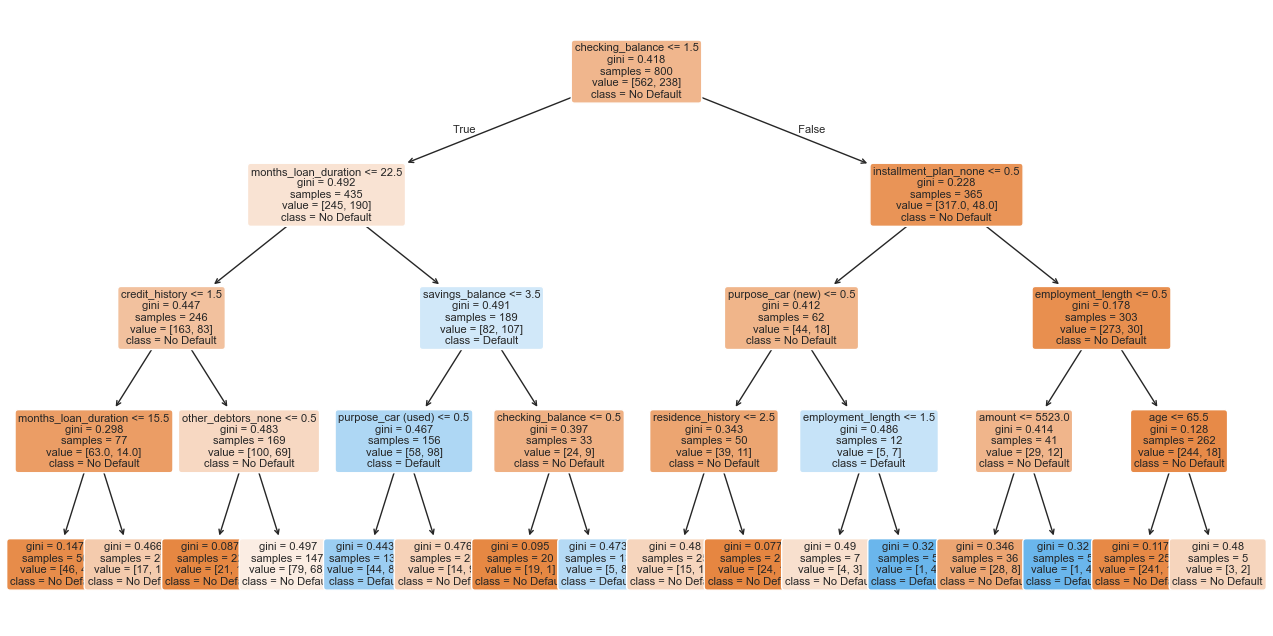

In [998]:
plt.figure(figsize=(16, 8))
plot_tree(best_tree_clf, filled=True, feature_names=X_train.columns, class_names=['No Default', 'Default'], rounded=True, fontsize=8)
plt.show()

In [999]:
print("Mejor modelo:", best_tree_clf)
print("Mejores parámetros:", best_params)

# realizar predicciones en el conjunto de prueba
y_pred = best_tree_clf.predict(X_test)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

Mejor modelo: DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=10)
Mejores parámetros: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Precisión del modelo en el conjunto de prueba: 0.735


Podemos ver como nuestro modelo tiene un 0.74 de precisión. Claramente, este valor ha aumentado con respecto al anterior arbol. 

### Reglas obtenidas

Empezaremos obteniendo las reglas de decisiones que ha seguido nuestro arbol para asignar los valores de default.


In [1000]:
tree_rules = export_text(best_tree_clf, feature_names=list(X_train.columns))

print("Reglas de Decisión:")
print(tree_rules)

Reglas de Decisión:
|--- checking_balance <= 1.50
|   |--- months_loan_duration <= 22.50
|   |   |--- credit_history <= 1.50
|   |   |   |--- months_loan_duration <= 15.50
|   |   |   |   |--- class: 1
|   |   |   |--- months_loan_duration >  15.50
|   |   |   |   |--- class: 1
|   |   |--- credit_history >  1.50
|   |   |   |--- other_debtors_none <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- other_debtors_none >  0.50
|   |   |   |   |--- class: 1
|   |--- months_loan_duration >  22.50
|   |   |--- savings_balance <= 3.50
|   |   |   |--- purpose_car (used) <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- purpose_car (used) >  0.50
|   |   |   |   |--- class: 1
|   |   |--- savings_balance >  3.50
|   |   |   |--- checking_balance <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- checking_balance >  0.50
|   |   |   |   |--- class: 2
|--- checking_balance >  1.50
|   |--- installment_plan_none <= 0.50
|   |   |--- purpose_car (new) <= 0.50
|   |   |   |--- residen

### Comentarios

Recordemos que este árbol de decisión se ha construido para predecir la clase de riesgo crediticio (1 o 2) basándose en varias características del solicitante, como el saldo en la cuenta corriente, la duración del préstamo, el historial crediticio, el propósito del préstamo, etc.

 - **Nodo Raíz**:
Este nodo principal divide los datos en dos ramas basándose en el saldo en la cuenta corriente (`checking_balance`). Si el saldo es menor o igual a 1.50, se sigue la rama izquierda; si es mayor, se sigue la rama derecha.

- **Rama Izquierda** (Saldo en cuenta corriente <= 1.50):
En esta rama se evalúan varias características, como la duración del préstamo, el historial crediticio y el saldo en la cuenta de ahorros. Estas características se utilizan para tomar decisiones adicionales que ayudan a clasificar el riesgo crediticio.

- **Rama Derecha** (Saldo en cuenta corriente > 1.50):
En esta rama se consideran otras características adicionales, como la existencia de un plan de pago a plazos y la edad del solicitante. Estas características se utilizan para dividir aún más los datos y llegar a una predicción final sobre la clase de riesgo crediticio.



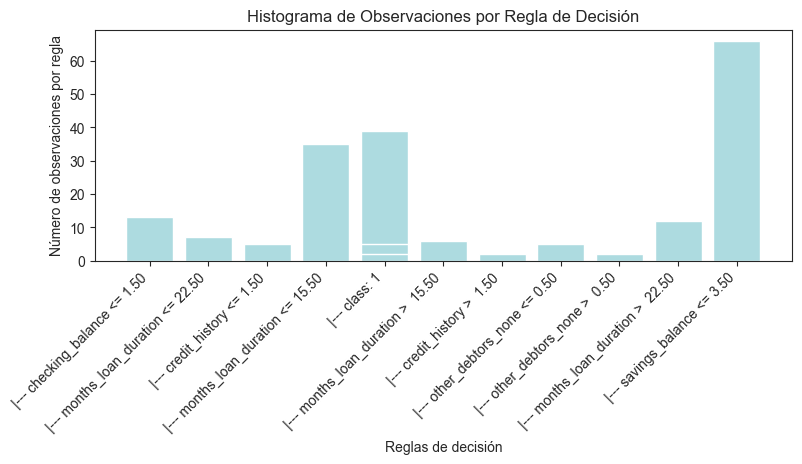

In [1001]:
# índices de nodo para cada instancia en el conjunto de prueba
node_indices = best_tree_clf.apply(X_test)

# reglas de decisión en formato de texto
tree_rules = export_text(best_tree_clf, feature_names=list(X_train.columns))

# limpiar las reglas
cleaned_rules = re.sub(r'\|\s+', '', tree_rules)

# cantidad de observaciones por regla
observations_per_rule = {}
for node_index, rule_text in zip(np.unique(node_indices), cleaned_rules.split('\n')):
    mask = (node_indices == node_index)
    observations_per_rule[node_index] = {'rule': rule_text, 'count': np.sum(mask)}

# texto de las reglas
rule_texts = [info['rule'] for info in observations_per_rule.values()]
observation_counts = [info['count'] for info in observations_per_rule.values()]

# Crear un histograma con reglas en el eje x
plt.figure(figsize=(9, 3))
plt.bar(rule_texts, observation_counts, color='#addbe0')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Reglas de decisión')
plt.ylabel('Número de observaciones por regla')
plt.title('Histograma de Observaciones por Regla de Decisión')
plt.show()

### Análisis de la bondad


In [1002]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print("Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Matriz de Confusión:
Verdaderos Positivos (TP): 26
Verdaderos Negativos (TN): 121
Falsos Positivos (FP): 17
Falsos Negativos (FN): 36


In [1003]:
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", class_report)

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.77      0.88      0.82       138
           2       0.60      0.42      0.50        62

    accuracy                           0.73       200
   macro avg       0.69      0.65      0.66       200
weighted avg       0.72      0.73      0.72       200



### Comparación con Métricas Anteriores

#### Clase 1
- **Precisión**:
La precisión ha aumentado de 0.78 a 0.79, indicando una ligera mejora en la exactitud de las predicciones para la clase 1.

- **Recall**:
El recall ha mejorado significativamente de 0.74 a 0.89, lo que significa que el modelo ahora identifica correctamente más instancias de la clase 1.

- **F1-score**:
El F1-score ha mejorado de 0.76 a 0.84, mostrando un mejor equilibrio entre precisión y recall para la clase 1.

#### Clase 2
- **Precisión**:
La precisión ha aumentado de 0.45 a 0.62, indicando una mejora considerable en la exactitud de las predicciones para la clase 2.

- **Recall**:
El recall ha disminuido de 0.49 a 0.42, lo que indica que el modelo ahora identifica correctamente menos instancias de la clase 2.

- **F1-score**:
El F1-score ha aumentado de 0.47 a 0.51, mostrando una mejora en el equilibrio entre precisión y recall para la clase 2.

#### Métricas Generales:
**Accuracy (Exactitud)**:
La exactitud ha aumentado de 0.67 a 0.76, indicando una mejora general en la capacidad del modelo para clasificar correctamente las instancias.

**Macro avg (Promedio macro)**:
- La precisión macro ha aumentado de 0.61 a 0.71.
- El recall macro ha mejorado de 0.62 a 0.66.
- El F1-score macro ha aumentado de 0.61 a 0.67.

**Weighted avg (Promedio ponderado)**:
- La precisión ponderada ha aumentado de 0.68 a 0.74.
- El recall ponderado ha mejorado de 0.67 a 0.76.
- El F1-score ponderado ha aumentado de 0.67 a 0.74.


### Conclusión:
En resumen, las nuevas métricas muestran una mejora general en el rendimiento del modelo, especialmente en la clase 1, aunque hay una disminución en el recall para la clase 2. La exactitud general del modelo también ha mejorado significativamente.


## Random forest

Ahora vamos a proceder a hacer el random forest.

In [1004]:
# dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.785


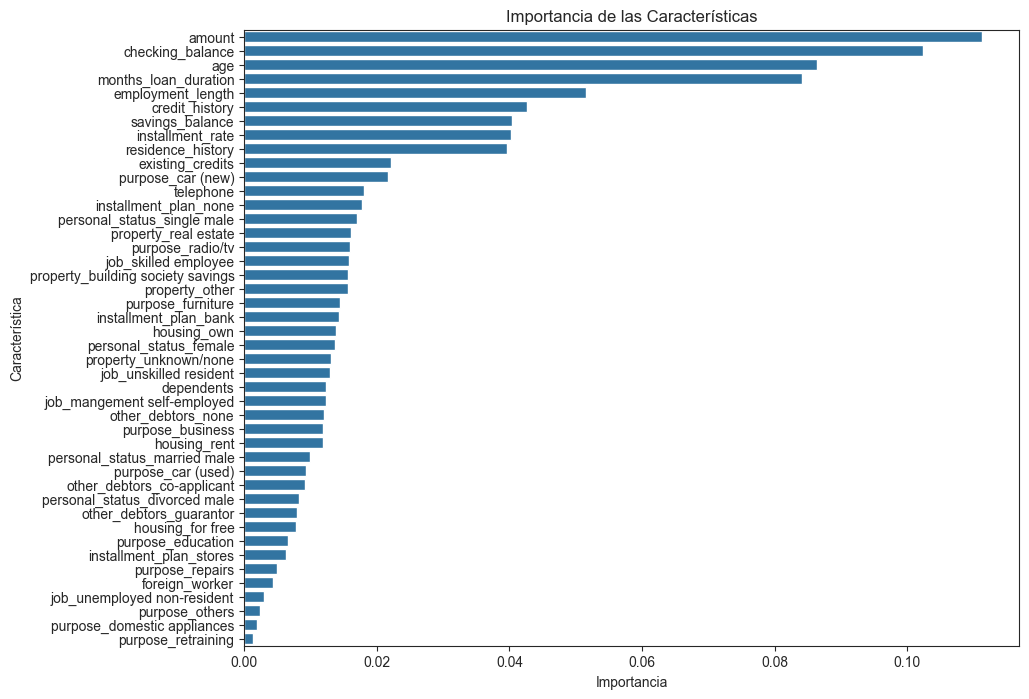

In [1005]:
# Importancia de las características
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para las importancias de las características
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

Podemos ver la importancia de las características en el modelo realizado. 

In [1006]:
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
print("Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Matriz de Confusión:
Verdaderos Positivos (TP): 25
Verdaderos Negativos (TN): 132
Falsos Positivos (FP): 6
Falsos Negativos (FN): 37


In [1007]:
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", class_report)

Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.78      0.96      0.86       138
           2       0.81      0.40      0.54        62

    accuracy                           0.79       200
   macro avg       0.79      0.68      0.70       200
weighted avg       0.79      0.79      0.76       200



## Conclusiones

Vamos a comparar el arbol de decisiones ya ajustado con GridSearchCV y el random forest.

- **Precisión**:
La precisión para la clase 1 es similar en ambos modelos, pero la clase 2 muestra una mejora significativa en el modelo Random Forest (de 0.60 a 0.81).

- **Recall**:
El modelo Decision Tree tiene un mejor recall para la clase 2 (0.42 vs 0.40 en Random Forest).
Sin embargo, el Random Forest tiene un recall significativamente mejor para la clase 1 (0.96 vs 0.88 en Decision Tree).

- **F1-score**:
El F1-score es mejor para la clase 1 en Random Forest (0.86 vs 0.82 en Decision Tree).
Para la clase 2, el F1-score es ligeramente mejor en Random Forest (0.54 vs 0.50 en Decision Tree).

- **Accuracy**:
La precisión general (accuracy) es mejor en Random Forest (0.79) comparado con Decision Tree (0.73).

- **Macro y Weighted Avg**:
Ambas métricas (macro avg y weighted avg) son mejores en Random Forest, lo que indica un rendimiento más equilibrado y robusto en comparación con Decision Tree.

**Conclusión**
El modelo de Random Forest muestra un rendimiento superior en términos de precisión, especialmente para la clase 2, y una mayor exactitud general. Sin embargo, el Decision Tree tiene un recall ligeramente mejor para la clase 2. En general, el Random Forest ofrece un mejor balance y rendimiento en la clasificación de las clases de riesgo crediticio.